# Lista 2

Nome: Hyago Vieira Lemes Barbosa Silva

## 1 - Suponha que haja 40 bolas em um chapéu, das quais 10 são vermelhas, 10 são azuis, 10 são amarelas e 10 são roxas. Qual é a probabilidade de obter duas bolas azuis e duas roxas ao tirar 10 bolas aleatoriamente do chapéu? O que muda no resultado caso a bola seja retirada e não reposta.

> Considerando reposição de bolas

**probabilidade de cada cor sendo que são 10 de cada no total 40:**

* p = 10/40 = 0.25, para as 4 cores.


In [57]:
import numpy as np

N = 100000
bolas_retiradas = 0
def realizar_experimento_teste1():
    escolha_correta = 0
    total_bolas = 40
    vermelhas, azuis, amarelas, roxas = [10, 10, 10, 10]

    bolas_azuis = bolas_roxas = 0

    for i in range(N):
      bolas_retiradas = np.random.choice(['vermelha', 'azul', 'amarela', 'roxa'], size=10, replace=True, p=[vermelhas/total_bolas, azuis/total_bolas, amarelas/total_bolas, roxas/total_bolas ])

      bolas_azuis = np.count_nonzero(bolas_retiradas == 'azul')
      bolas_roxas = np.count_nonzero(bolas_retiradas == 'roxa')

      if bolas_azuis == 2 and bolas_roxas == 2:
          escolha_correta += 1


    return escolha_correta/N

def realizar_experimento_teste2():
    escolha_correta = 0
    total_bolas = 40
    vermelhas, azuis, amarelas, roxas = [10, 10, 10, 10]

    for i in range(N):
        bolas_retiradas = np.random.multinomial(10, [vermelhas/total_bolas, azuis/total_bolas, amarelas/total_bolas, roxas/total_bolas])

        bolas_azuis = bolas_retiradas[1]
        bolas_roxas = bolas_retiradas[3]

        if bolas_azuis == 2 and bolas_roxas == 2:
            escolha_correta += 1

    return escolha_correta / N

def realizar_experimento_teste3():
  escolha_correta = 0
  limiar_vermelha = 0.25
  limiar_azul = 0.5
  limiar_amarela = 0.75
  i = 0
  for i in range(N):
      bolas_azuis, bolas_roxas = [0, 0]
      for i in range(10):
        u = np.random.uniform()
        if limiar_vermelha < u < limiar_azul: bolas_azuis += 1
        elif limiar_amarela < u: bolas_roxas += 1
      if bolas_azuis == 2 and bolas_roxas == 2: escolha_correta += 1

  return escolha_correta/N

print('Probabilidade sem reposição teste1 analitico:', realizar_experimento_teste1())
print('Probabilidade sem reposição teste2 analitico:', realizar_experimento_teste2())
print('Probabilidade sem reposição teste3 simulação:', realizar_experimento_teste3())

Probabilidade sem reposição teste1 analitico: 0.07679
Probabilidade sem reposição teste2 analitico: 0.07606
Probabilidade sem reposição teste3 simulação: 0.07702


> Considerando sem reposição

É retirado 1 bola a cada interação, portanto a probabilidade de retirar outra muda subtraindo 1 do total.

In [58]:
import numpy as np
N = 100000

def realizar_experimento_teste1():
    escolha_correta = 0
    total_bolas = 40
    vermelhas, azuis, amarelas, roxas = [10, 10, 10, 10]

    for i in range(N):
        bolas_disponiveis = ['vermelha'] * vermelhas + ['azul'] * azuis + ['amarela'] * amarelas + ['roxa'] * roxas

        bolas_retiradas = []

        for i in range(10):
            bola_escolhida = np.random.choice(bolas_disponiveis)
            bolas_retiradas.append(bola_escolhida)
            bolas_disponiveis.remove(bola_escolhida)

        bolas_azuis = bolas_retiradas.count('azul')
        bolas_roxas = bolas_retiradas.count('roxa')

        if bolas_azuis == 2 and bolas_roxas == 2:
            escolha_correta += 1

    return escolha_correta / N

def realizar_experimento_teste2():
  escolha_correta = 0
  for _ in range(N):
    bolas_azuis = 0
    bolas_roxas = 0
    vermelha, azul, amarela, roxa = [10,10,10,10]
    total_bolas = 40

    for _ in range(10):

      limiar_vermelha = vermelha/total_bolas
      limiar_azul = azul/total_bolas + limiar_vermelha
      limiar_amarela = amarela/total_bolas + limiar_azul

      total_bolas -= 1
      u = np.random.uniform()

      if u < limiar_vermelha:
        vermelha -= 1
      elif u < limiar_azul:
        bolas_azuis += 1
        azul -= 1
      elif u < limiar_amarela:
        amarela -= 1
      else:
        bolas_roxas += 1
        roxa -= 1

    if bolas_azuis == 2 and bolas_roxas == 2:
       escolha_correta += 1


  return escolha_correta/N
print('Probabilidade sem reposição analitica:', realizar_experimento_teste1())
print('Probabilidade sem reposição simulação:', realizar_experimento_teste2())

Probabilidade sem reposição analitica: 0.09192
Probabilidade sem reposição simulação: 0.09208


## 2 - Faça um programa para estimar a probabilidade de obter pelo menos um dado com seis ao lançar 5 dados.

In [59]:
import random
N = 1000000
dados = 5

def realizar_experimento_teste1():
  face_correta = 0
  for _ in range(N):
    for _ in range(dados):
      u = np.random.uniform()
      if u > 5/6:
        face_correta += 1
        break
  return face_correta/N


def realizar_experimento_teste2():
    count = 0
    for _ in range(N):
        rolls = [random.randint(1, 6) for _ in range(5)]
        if 6 in rolls:
            count += 1
    return count / N


print('Probabilidade analitica estimada com monte carlo:', realizar_experimento_teste2())
print('Probabilidade com simulação:',realizar_experimento_teste1())

Probabilidade analitica estimada com monte carlo: 0.597007
Probabilidade com simulação: 0.598626


## 3 - Você paga 1 real e pode lançar quatro dados. Se a soma dos olhos nos dados for inferior a 9, recebe de volta r reais, caso contrário perde o investimento de 1 reais. Suponha que r = 10. Você vai, então, a longo prazo, ganhar ou perder dinheiro ao jogar este jogo?

> vai perder na maioria das vezes, depende do número de jogadas, caso jogue de primeira e consiga ja um valor inferior a 9 e pare por ali mesmo.

In [60]:
possibilidades = 6**4
success = 4 + 6 + 12 + 20 + 30

p = success / possibilidades

print(f"A probabilidade de a soma ser inferior a 9 é {p:.4f}, superior seria {1-p:.4f}, você irá ganhar pouco e perder muito até perder tudo")


A probabilidade de a soma ser inferior a 9 é 0.0556, superior seria 0.9444, você irá ganhar pouco e perder muito até perder tudo


In [61]:
import numpy as np

N = 10000
media_perdida = []

def realizar_experimento():
    banca = 10
    i = 0
    for _ in range(N):
        soma_dados = 0
        for _ in range(4):
            u = np.random.uniform()
            if u < 1 / 6:
                soma_dados += 6
            else:
                soma_dados += np.floor(u * 6) + 1

        if soma_dados < 9:
            banca += 10
        else:
            banca -= 1

    return (banca / N)*-1, i

media_ganhos, i = realizar_experimento()

if media_ganhos > 0:
    print("A longo prazo, você ganhará dinheiro ao jogar este jogo.", media_ganhos, "% das jogadas")
else:
    print("A longo prazo, você perderá dinheiro ao jogar este jogo.", media_ganhos, " jogadas")

A longo prazo, você ganhará dinheiro ao jogar este jogo. 0.9935 % das jogadas


## 4 - Resova as seguintes integrais pelo método da integração de monte carlo e pelométodo da integração por importância


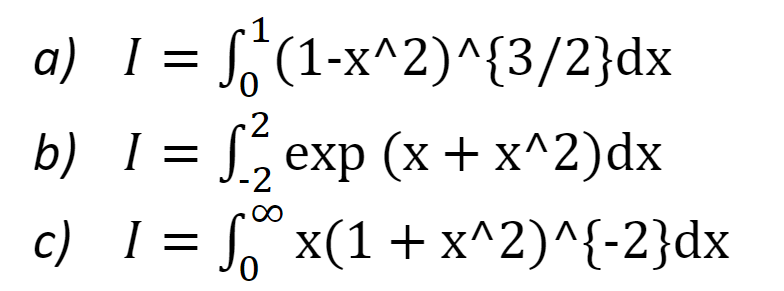

### a -  Monte carlo

> Resolução esta no caderno

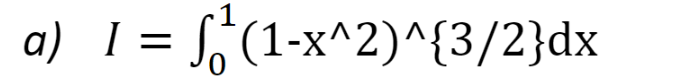

In [62]:
import numpy as np

N = 1000000
u = np.random.uniform(0, 1, N)
res = sum((1-u**2)**(3/2))/N
print('O resultado da integral pelo Método de Monte Carlo é', res)

O resultado da integral pelo Método de Monte Carlo é 0.5886608354012401


### a -  Amostagem ou integral por importancia

In [63]:
import matplotlib.pyplot as plt

x = 1 - np.sqrt(1 - u)
res = sum(((1-x**2)**(3/2))/(2*(1-x)))/N
print('O resultado da integral pelo Método de Importância', res, '\n')

O resultado da integral pelo Método de Importância 0.5889629368518373 



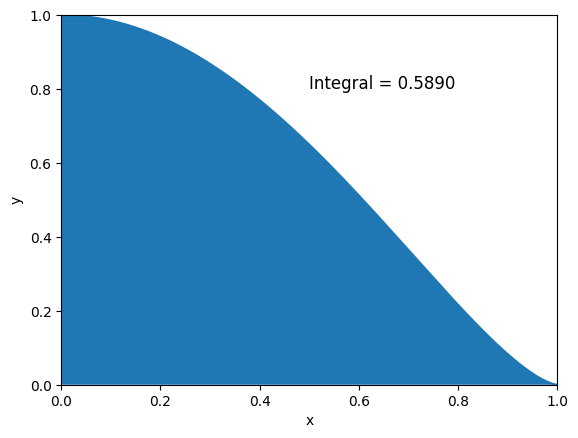

In [64]:
x = np.linspace(0, 1, N)
function = ((1 - x**2)**(3/2))

plt.plot(x, function)
plt.xlim(0, 1), plt.ylim(0, 1)
plt.xlabel('x'), plt.ylabel('y')
plt.text(0.5, 0.8, f'Integral = {res:.4f}', fontsize=12)
plt.fill_between(x, function)
plt.show()

### b - Monte carlo
> Resolução esta no caderno

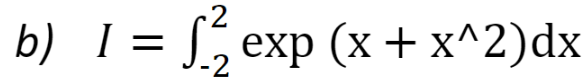

In [65]:
import numpy as np

N = 1000000
u = np.random.uniform(0, 1, N)
res = 4*sum(np.exp(((4*u-2)**2) + (4*u-2)))/N
print('O resultado da integral pelo Método de Monte Carlo é', res)

O resultado da integral pelo Método de Monte Carlo é 93.58299627042803


### b - Amostagem ou integral por importancia

In [66]:
x = np.log((1+u*(np.exp(4)-1))/np.exp(2))
res = np.sum(np.exp(x**2 + x)/(np.exp(2)/(np.exp(4)-1)*np.exp(x)))/N
print('O resultado da integral pelo Método de Importância', res, '\n')

O resultado da integral pelo Método de Importância 93.25173516604757 



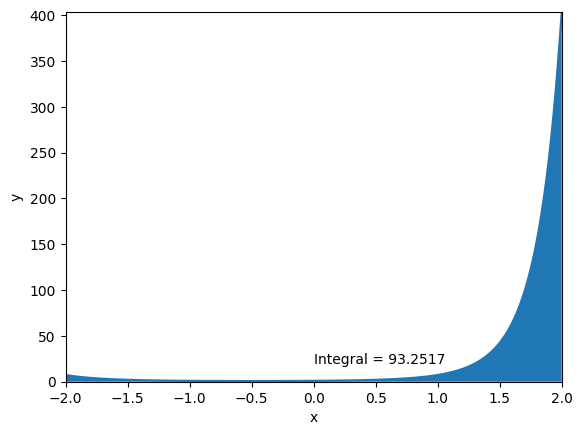

In [67]:
x = np.linspace(-2, 2, N)
function = np.exp(x**2 + x)

plt.plot(x, function)
plt.xlim(-2, 2), plt.ylim(0, np.exp(2**2 + 2))
plt.xlabel('x'), plt.ylabel('y')
plt.text(0, 20, f'Integral = {res:.4f}')
plt.fill_between(x, function)
plt.show()

### c - Monte carlo

> Resolução esta no caderno



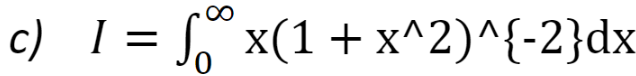

In [68]:
import numpy as np

N = 1000000
u = np.random.uniform(0, 1, N)
res = 4*sum(np.exp(pow(4*u-2, 2) + (4*u-2)))/N
print('O resultado da integral pelo Método de Monte Carlo é', res)

O resultado da integral pelo Método de Monte Carlo é 92.85522310496353


### c - Amostagem ou integral por importancia

In [69]:
x = -1*np.log(1 - u)
res = sum(x*pow(x**2 + 1, -2)/np.exp(-x))/N
print('O resultado da integral pelo Método de Importância', res, '\n')

O resultado da integral pelo Método de Importância 0.4974498044670596 



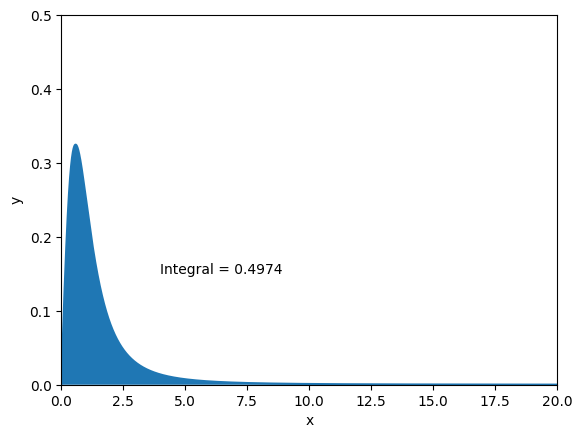

In [70]:
x = np.linspace(0, 1000, N)
function = x/(x**2 + 1)**2

plt.plot(x, function)
plt.fill_between(x, function)
plt.xlim(0, 20); plt.xlabel('x'), plt.ylabel('y')
plt.text(4, 0.15, f'Integral = {res:.4f}')
plt.ylim(0, 0.5)
plt.show()